<a href="https://colab.research.google.com/github/codonSp/Test/blob/master/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#upload data to google drive
from google.colab import files
uploaded = files.upload()

In [49]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.3)


In [0]:
from sklearn.model_selection import cross_validate

In [0]:
# from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [0]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [123]:
#df = pd.read_csv('../input/mytest.csv')
df = pd.read_csv('https://raw.githubusercontent.com/codonSp/Test/master/bigml_59c28831336c6604c800002a.csv')

print (df2.shape)

NameError: ignored

In [13]:
print(df.shape)

(3333, 21)


In [130]:
df.iloc[:10,20:]

,churn,first,second,second1
0,False,382,4657,4
1,False,371,7191,3
2,False,358,1921,3
3,False,375,9999,1
4,False,330,6626,2
5,False,391,8027,4
6,False,355,9993,2
7,False,329,9001,3
8,False,335,4719,4
9,False,330,8173,4


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


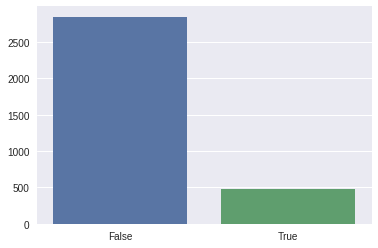

In [20]:
t = df['churn'].value_counts()
sns.barplot(t.index, t.values)

EDA

In [138]:
df.describe()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,first,second1
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,...,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,374.074407,3.432943
std,14.824911,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,...,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,27.467320,0.612559
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,327.000000,1.000000
25%,14.000000,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,...,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,350.000000,3.000000
50%,26.000000,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,...,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,374.000000,3.000000
75%,39.000000,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,...,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,398.000000,4.000000
max,50.000000,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,...,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,422.000000,4.000000


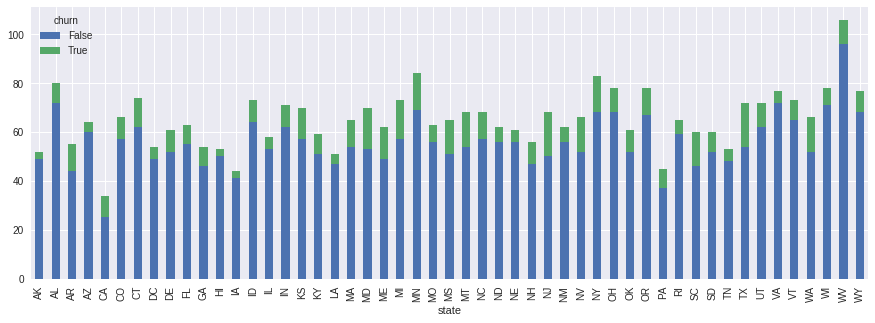

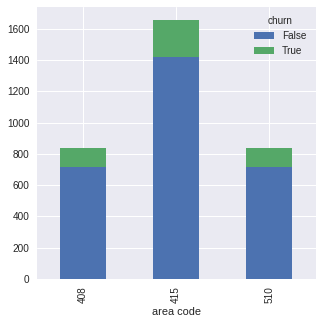

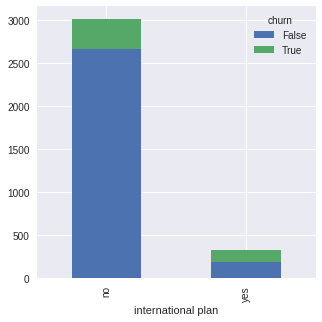

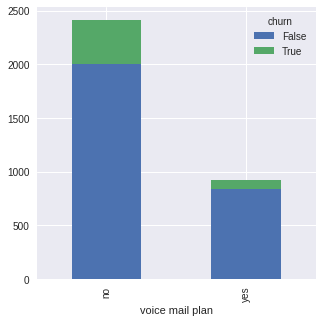

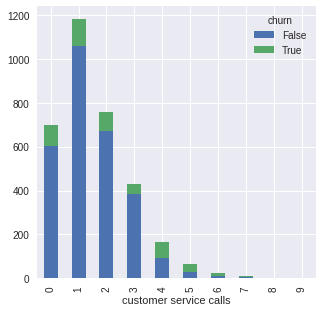

In [26]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(15,5))
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
df.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

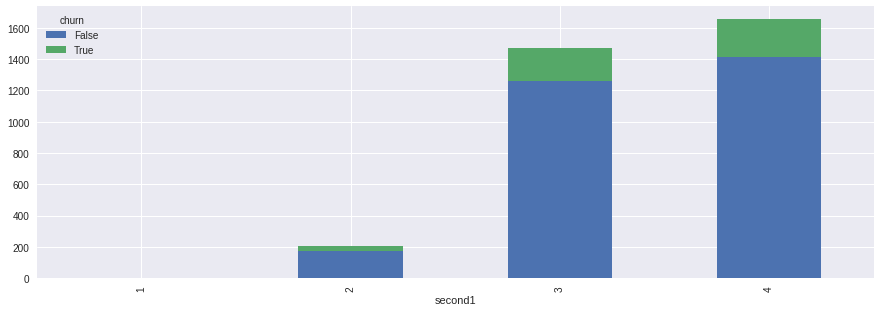

In [132]:
df.groupby(["second1", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(15,5))

label encodes

In [0]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])



In [0]:

#one hot encoding
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
dfDummies = pd.get_dummies(df['area code'], prefix = 'area')

Phone number


In [0]:
df[['first','second']] = df['phone number'].str.split("-", n = 1, expand = True).astype(int)



In [0]:

df['second1'] = df['second'].apply(lambda x: len(set(str(x))))

In [90]:
len(set(str(122226)))

TypeError: ignored

In [0]:
df1 = pd.concat([df, dfDummies], axis=1).drop(['area code'],axis=1)

In [104]:
df1.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
0                           96
1                         3333
dtype: int64

In [110]:
df1.iloc[:5,20:]

,churn,0,1
0,False,382,4657
1,False,371,7191
2,False,358,1921
3,False,375,9999
4,False,330,6626


In [0]:
y = df['churn'].as_matrix().astype(np.int)
y.size

In [0]:
# df = df.drop(["Id","Churn"], axis = 1, inplace=True)
df.drop(["phone number","second","churn"], axis = 1, inplace=True)

In [0]:
X = df.as_matrix().astype(np.float)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [55]:
from sklearn.model_selection import StratifiedKFold
stratified_k_fold = StratifiedKFold(n_splits=10, shuffle=True)
stratified_k_fold.get_n_splits(X, y)

10

In [0]:
from sklearn.model_selection import StratifiedKFold
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=5, **kwargs):
    skf = StratifiedKFold(n_splits=2)
    stratified_k_fold = StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X,y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred


In [172]:
import warnings
warnings.filterwarnings("ignore")
print('Gradient Boosting :  {:.4f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Random Forest :      {:.4f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))


Gradient Boosting :  0.9529
Random Forest :      0.9388


In [173]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [171]:
X[0]

array([-0.6786493 ,  0.67648946, -0.52360328, -0.32758048,  1.6170861 ,
        1.23488274,  1.56676695,  0.47664315,  1.56703625, -0.07060962,
       -0.05594035, -0.07042665,  0.86674322, -0.46549436,  0.86602851,
       -0.08500823, -0.60119509, -0.0856905 , -0.42793202,  0.92585609])

In [166]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'second1'],
      dtype='object')

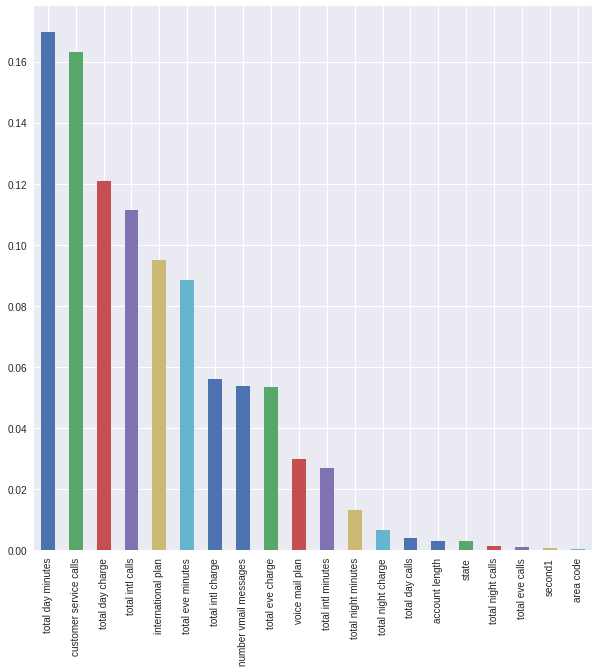

In [177]:
feature_importance = gbc.feature_importances_
feat_importances = pd.Series(gbc.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(21)
feat_importances.plot(kind='bar' , figsize=(10,10)) 